
This notebook uses the output of the rule
--- 75_assm_stats.smk::dump_suppl_tables_contiguity
as input, and produces a panel for figure 1.

Execution directory:  /home/local/work/code/github/project-male-assembly/notebooks/plotting/assm_stats
Working directory:  /home/local/work/data/sig_chrY/paper
Output directory:  /home/local/work/data/sig_chrY/paper/output/figures


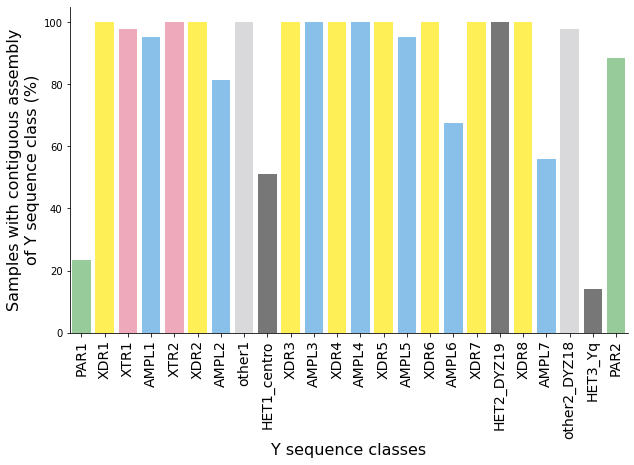

In [3]:
import pandas as pd
import numpy as np
import pathlib as pl
import matplotlib as mpl
import matplotlib.pyplot as plt

desc="""
This notebook uses the output of the rule
--- 75_assm_stats.smk::dump_suppl_tables_contiguity
as input, and produces a panel for figure 1.
"""

# required to have text output as "text fields"
# and not individual objects
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

save_plots = True

print(desc)

repo_dir = pl.Path('/home/local/work/code/github/project-male-assembly').resolve(strict=True)
exec_dir = pl.Path('.').resolve(strict=True)
wd_dir = pl.Path('/home/local/work/data/sig_chrY/paper')
out_dir = pl.Path('/home/local/work/data/sig_chrY/paper/output/figures').resolve(strict=True)

print('Execution directory: ', exec_dir)
print('Working directory: ', wd_dir)
print('Output directory: ', out_dir)
print('=================================')

t2t_classes = wd_dir / pl.Path('annotation_tables', 'T2T.chrY-seq-classes.tsv')
t2t = pd.read_csv(t2t_classes, sep='\t', header=0)

assm_contiguity_file = wd_dir / pl.Path('stats', 'contiguity', 'ctgassm-seqcls.by-sample.HIFIRW.ONTUL.na.chrY.pivot.tsv')

assm_ctg = pd.read_csv(assm_contiguity_file, sep='\t', header=0, comment='#', index_col=0)

pct_contig_assm = (assm_ctg.sum(axis=0) / assm_ctg.shape[0] * 100).round(1)

fig, ax = plt.subplots(figsize=(10,6))
fig_name = 'samples_w_contig_assm_seq_class'

ax.bar(
    np.arange(1, pct_contig_assm.shape[0]+1),
    height=pct_contig_assm,
    color=[(row.red,row.green,row.blue) for row in t2t.itertuples()]
)
ax.set_xlim(0.5, 24.5)
ax.set_ylabel(
    'Samples with contiguous assembly\nof Y sequence class (%)',
    fontsize=16
)
ax.set_xlabel(
    'Y sequence classes',
    fontsize=16
)
ax.set_xticks(np.arange(1, pct_contig_assm.shape[0]+1))
ax.set_xticklabels(
    [row.name for row in t2t.itertuples()],
    fontsize=14,
    rotation=90
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

if save_plots:
    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.png'),
        dpi=150, bbox_inches='tight', transparent=False
    )

    plt.savefig(
        out_dir / pl.Path(f'{fig_name}.pdf'),
        bbox_inches='tight', transparent=False
    )